### Bibliotecas Utilizadas:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

 - Faça um ranking para o número total de PAX por dia da semana. - - Power BI
 - Qual a correlação de sábado e domingo somados com o total de RPK? - ????
 - Qual a média de ‘Monetário’ por mês por Canal? E a mediana? - Power BI
 - Crie um forecast de PAX por ‘Local de Venda’ para os próximos 15 dias a contar da última data de venda. (Aqui a técnica é livre) - Série Temporal
 - Supondo que você precisa gerar um estudo para a área responsável, com base em qualquer modelo ou premissa, qual ‘Local de Venda’ você considera mais crítico. Por quê? - Power BI
 - Criar modelo relacionando o comporatamento de venda com variaveis não apresentada nos dados (Ex : PIB, Dolar, e etc)  - Regressão Múltipla

 Observações: 
 
 - PAX é o total de passageiros. RPK é um indicador diretamente relacionada com o número de PAX.
 - Não se atenha às grandezas. Os dados são fictícios. 😉
 - Envie todo o material que produzir (códigos, tabelas e outros arquivos) com o detalhamento de cada um. Se possível, comente nos códigos.
 - Para a apresentação, use PowerPoint ou qualquer outra ferramenta de DataViz que julgar pertinente.


Pelo próprio excel o xlsx foi modificado apenas para estar com a aba dados e salvo em csv, UTF-8 delimitado por ;

In [115]:
df = pd.read_csv('data.csv',sep=';')

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2432 entries, 0 to 2431
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Data Venda         2432 non-null   object
 1   Canal de Venda     2432 non-null   object
 2   Local de Venda     2432 non-null   object
 3   PAX                2432 non-null   int64 
 4   Monetário Vendido  2432 non-null   object
 5   RPK                2432 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 114.1+ KB


In [117]:
#Observando qualidade de preenchimento do dataset;

df.isnull().sum()

Data Venda           0
Canal de Venda       0
Local de Venda       0
PAX                  0
Monetário Vendido    0
RPK                  0
dtype: int64

Organizando as variáveis e atribuindo seu tipo correto.

In [118]:
df["Data Venda"] = pd.to_datetime(df["Data Venda"])

df[['Canal de Venda','Local de Venda']] = df[['Canal de Venda','Local de Venda']].astype('category')

df[['PAX','RPK']] = df[['PAX','RPK']].astype('float')


In [119]:
df["Monetário Vendido"] = df["Monetário Vendido"].str.replace(",", ".")
df["Monetário Vendido"] = df["Monetário Vendido"].astype('float')

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2432 entries, 0 to 2431
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Data Venda         2432 non-null   datetime64[ns]
 1   Canal de Venda     2432 non-null   category      
 2   Local de Venda     2432 non-null   category      
 3   PAX                2432 non-null   float64       
 4   Monetário Vendido  2432 non-null   float64       
 5   RPK                2432 non-null   float64       
dtypes: category(2), datetime64[ns](1), float64(3)
memory usage: 81.2 KB


In [121]:
df.isnull().sum()

Data Venda           0
Canal de Venda       0
Local de Venda       0
PAX                  0
Monetário Vendido    0
RPK                  0
dtype: int64

#### Criando uma coluna que contenha os dia da semana;

 - Nova coluna contendo: Conversão de dia para dia da semana;

In [122]:
df['Dia Semana'] = df['Data Venda'].dt.dayofweek
df['Dia Semana'].sample(5)

1832    3
400     5
1531    6
1624    0
1937    4
Name: Dia Semana, dtype: int64

De acordo com a documentação do dayofweek: 
    
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.dayofweek.html

"... Monday, which is denoted by 0 and ends on Sunday which is denoted by 6..." 

In [123]:
df['Dia Semana Nome'] = df['Data Venda'].dt.day_name()
df['Dia Semana Nome'].sample(5)

259      Thursday
1987    Wednesday
806     Wednesday
408      Saturday
2372    Wednesday
Name: Dia Semana Nome, dtype: object

In [124]:
df.groupby(['Dia Semana Nome'])['PAX'].agg('sum').sort_values(ascending=False)

Dia Semana Nome
Friday       294850.0
Wednesday    273131.0
Sunday       265466.0
Monday       245820.0
Tuesday      231388.0
Saturday     224706.0
Thursday     222982.0
Name: PAX, dtype: float64

## Repostas

 - Faça um ranking para o número total de PAX por dia da semana.
 - Qual a correlação de sábado e domingo somados com o total de RPK?
 - Qual a média de ‘Monetário’ por mês por Canal? E a mediana?
 - Crie um forecast de PAX por ‘Local de Venda’ para os próximos 15 dias a contar da última data de venda. (Aqui a técnica é livre) 
 - Supondo que você precisa gerar um estudo para a área responsável, com base em qualquer modelo ou premissa, qual ‘Local de Venda’ você considera mais crítico. Por quê?
 - Criar modelo relacionando o comporatamento de venda com variaveis não apresentada nos dados (Ex : PIB, Dolar, e etc)  

In [126]:
df.describe()

PAX  Monetário Vendido            RPK   Dia Semana
count  2432.000000        2432.000000    2432.000000  2432.000000
mean    723.002878       24638.740415   66738.389391     2.914474
std     735.936451       22424.842784   83479.039478     2.019874
min      18.000000        1041.540000    1127.000000     0.000000
25%     100.000000        6122.922500   11372.000000     1.000000
50%     395.500000       17755.420000   33361.500000     3.000000
75%    1160.250000       35535.325000   95116.750000     5.000000
max    4705.000000      144890.730000  695824.000000     6.000000

In [127]:
df.sample(15)

Data Venda Canal de Venda Local de Venda     PAX  Monetário Vendido  \
1842 2017-02-24  Porta a Porta      Mindscape   988.0           33282.00   
540  2016-04-12      TeleVenda      Mindscape  1499.0           64780.44   
1694 2017-02-14      TeleVenda      Mindscape    33.0            1821.39   
1392 2017-01-27      TeleVenda           Vast   251.0           15232.24   
275  2016-11-18  Porta a Porta           Vast   979.0           25471.94   
1077 2017-07-01      Telégrafo           Vast   101.0            6631.92   
618  2016-09-12      TeleVenda           Vast   294.0           18094.27   
1201 2017-01-15  Porta a Porta       Ellipsis   369.0           13851.89   
1790 2017-02-20  Porta a Porta      Mindscape  1343.0           34357.48   
386  2016-11-25      Telégrafo      Mindscape    69.0            5680.50   
1213 2017-01-15  Porta a Porta           Vast   505.0           16815.90   
1942 2017-02-03      Telégrafo      Mindscape    87.0            4764.24   
1540 2017-05-02      TeleVenda           Vast   347.0           18147.35   
1104 2017-09-01      TeleVenda          Arena   128.0            7343.77   
234  2016-11-15      Telégrafo      Mindscape    79.0            4338.61   

           RPK  Dia Semana Dia Semana Nome  
1842  112800.0           4          Friday  
540   178855.0           1         Tuesday  
1694    3738.0           1         Tuesday  
1392   12430.0           4          Friday  
275    43189.0           4          Friday  
1077    4722.0           5        Saturday  
618    14229.0           0          Monday  
1201   19829.0           6          Sunday  
1790  159889.0           0          Monday  
386     7986.0           4          Friday  
1213   23984.0           6          Sunday  
1942   11321.0           4          Friday  
1540   15992.0           1         Tuesday  
1104   19463.0           4          Friday  
234    10307.0           1         Tuesday

#### Análise Exploratória dos Dados

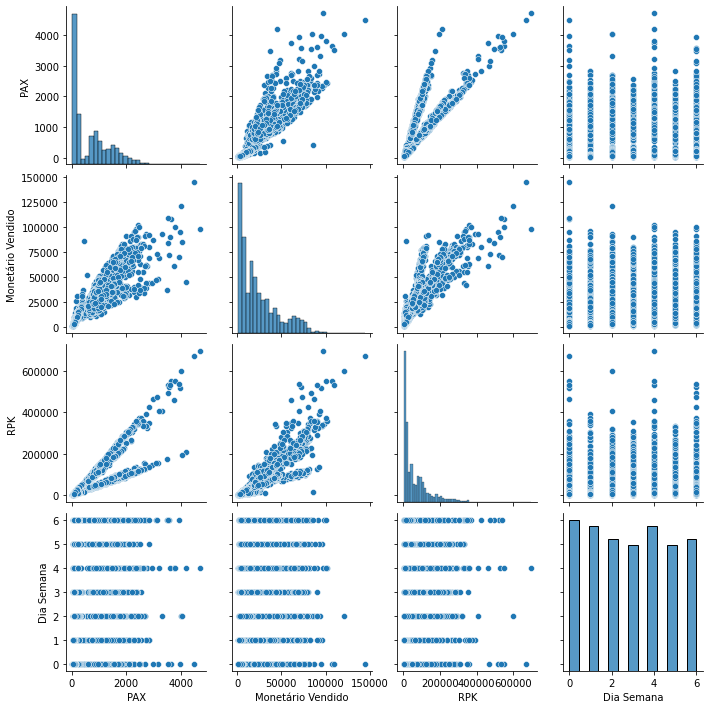

In [128]:
sns.pairplot(df)

#### Modelo relacionando o comportamento de venda com variaveis não apresentada nos dados (Ex : PIB, Dolar, e etc)  

Criar modelo relacionando o comporatamento de venda com variaveis não apresentada nos dados (Ex : PIB, Dolar, e etc)

Brainstorm de possíveis variáveis a avaliar:

PIB,
Aumento população,
Dolar,
Euro,
Ações,
Condições Climáticas, ( Estações do Ano )
Desemprego,
IPCA,
Selic,
CDI

Para coleta de algumas variáveis é necessário supor uma vez que os dados são fictícios! 

Estações do Ano, Jet fuel, Dolar price. 
tive a liberardade de considerar que estamos falando de Brasil uma vez que Monetário Vendido estava inicialmente em R$

In [3]:
df=pd.read_csv('data_modified.csv',sep=';') # Foram adicionadas duas colunas com Jet fuel price e Taxa de Desemprego no Brasil

fonte - Desemprego: https://www.ibge.gov.br/estatisticas/sociais/trabalho/9173-pesquisa-nacional-por-amostra-de-domicilios-continua-trimestral.html?=&t=series-historicas&utm_source=landing&utm_medium=explica&utm_campaign=desemprego

fonte - Fuel Jet Price: https://www.indexmundi.com/pt/pre%C3%A7os-de-mercado/?mercadoria=combust%c3%advel-de-jato&meses=60

Pensei em pegar os valores de dólar porém obtive muitos dados que seriam necessários grande tempo para sincronizar as datas, desta forma resolvi seguir assim mesmo

In [132]:
df.columns

Index(['Data Venda', 'Canal de Venda', 'Local de Venda', 'PAX',
       'Monetário Vendido', 'RPK', 'Preço Jet Fuel',
       'Taxa de Desemprego Brasil'],
      dtype='object')

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2432 entries, 0 to 2431
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Data Venda                 2432 non-null   object 
 1   Canal de Venda             2432 non-null   object 
 2   Local de Venda             2432 non-null   object 
 3   PAX                        2432 non-null   int64  
 4   Monetário Vendido          2432 non-null   object 
 5   RPK                        2432 non-null   int64  
 6   Preço Jet Fuel             2432 non-null   object 
 7   Taxa de Desemprego Brasil  2432 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 152.1+ KB


In [4]:
df.isnull().sum()

Data Venda                   0
Canal de Venda               0
Local de Venda               0
PAX                          0
Monetário Vendido            0
RPK                          0
Preço Jet Fuel               0
Taxa de Desemprego Brasil    0
dtype: int64

In [135]:
#Mudando os Dtypes das variáveis:

df["Data Venda"] = pd.to_datetime(df["Data Venda"])

df[['Canal de Venda','Local de Venda']] = df[['Canal de Venda','Local de Venda']].astype('category')

df[['PAX','RPK']] = df[['PAX','RPK']].astype('float')

In [136]:
df["Monetário Vendido"] = df["Monetário Vendido"].str.replace(",", ".")
df["Monetário Vendido"] = df["Monetário Vendido"].astype('float')

In [138]:
df['Preço Jet Fuel'] = df['Preço Jet Fuel'].str.replace(",", ".")
df['Preço Jet Fuel'] = df['Preço Jet Fuel'].astype('float')

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2432 entries, 0 to 2431
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Data Venda                 2432 non-null   datetime64[ns]
 1   Canal de Venda             2432 non-null   category      
 2   Local de Venda             2432 non-null   category      
 3   PAX                        2432 non-null   float64       
 4   Monetário Vendido          2432 non-null   float64       
 5   RPK                        2432 non-null   float64       
 6   Preço Jet Fuel             2432 non-null   float64       
 7   Taxa de Desemprego Brasil  2432 non-null   float64       
dtypes: category(2), datetime64[ns](1), float64(5)
memory usage: 119.2 KB


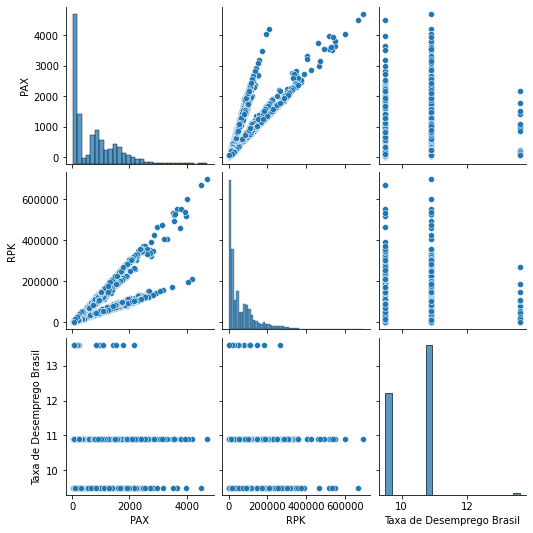

In [134]:
sns.pairplot(df)

<AxesSubplot:>

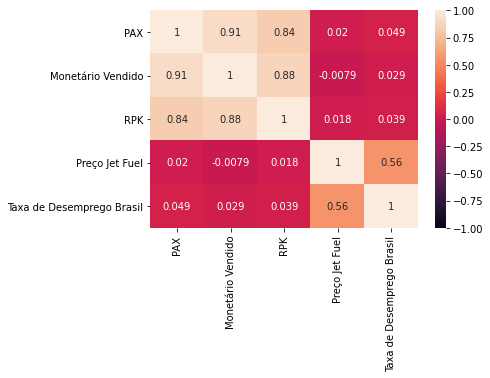

In [140]:
sns.heatmap(df[['PAX',
       'Monetário Vendido', 'RPK', 'Preço Jet Fuel',
       'Taxa de Desemprego Brasil']].corr(),vmax=1,vmin=-1,annot=True)

### Regressão Linear com PAX x Monetário Vendido


- RPK altamente relacionada com PAX, vai sair para que não haja problemas com a multicolineariedade;
- Taxa Desmprego do Brasil e Prejo do Jet Fuel não influenciaram como pensei, 
o jet fuel pensei que aumentaria o preço e teria um impacto negativo no monetário, porém é muito baixa a correlação
- Seguindo com regressão linear simples PAX x Monetário Vendido


<AxesSubplot:xlabel='PAX', ylabel='Monetário Vendido'>

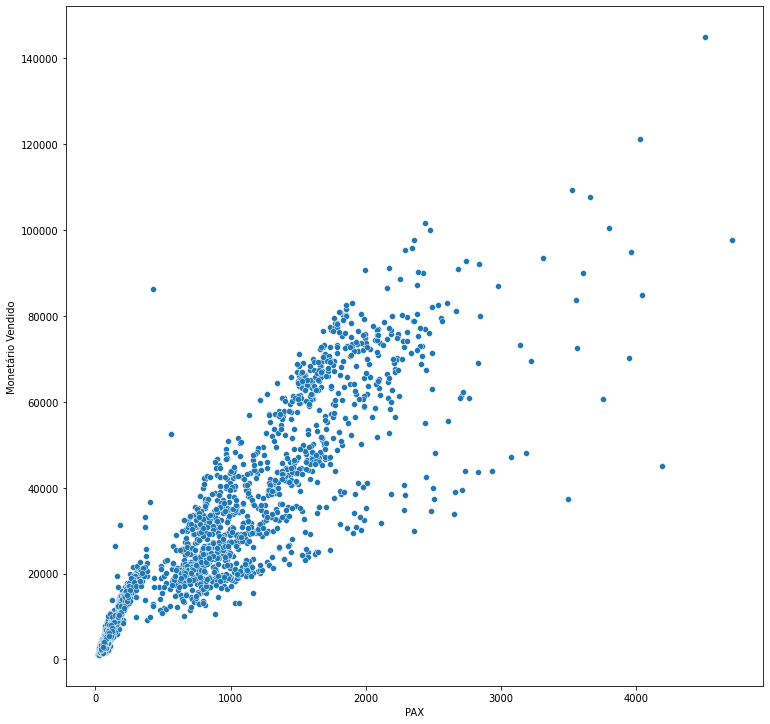

In [142]:
plt.figure(figsize=(12.5,12.5))
sns.scatterplot(data=df,x='PAX',y='Monetário Vendido')


In [159]:
df.describe()

PAX  Monetário Vendido            RPK  Preço Jet Fuel  \
count  2432.000000        2432.000000    2432.000000     2432.000000   
mean    723.002878       24638.740415   66738.389391        1.471447   
std     735.936451       22424.842784   83479.039478        0.063771   
min      18.000000        1041.540000    1127.000000        1.360000   
25%     100.000000        6122.922500   11372.000000        1.450000   
50%     395.500000       17755.420000   33361.500000        1.490000   
75%    1160.250000       35535.325000   95116.750000        1.510000   
max    4705.000000      144890.730000  695824.000000        1.550000   

       Taxa de Desemprego Brasil  
count                2432.000000  
mean                   10.355921  
std                     0.733988  
min                     9.500000  
25%                     9.500000  
50%                    10.900000  
75%                    10.900000  
max                    13.600000

In [160]:
# Criação do modelo de regressão linear pelo statsmodels

import statsmodels.api as sm

In [167]:
X=df['PAX']
y=df['Monetário Vendido']

In [169]:
spector_data = sm.datasets.spector.load(as_pandas=False)

spector_data.exog = sm.add_constant(spector_data.exog, prepend=False)

mod = sm.OLS(X, y)

res = mod.fit()

print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                    PAX   R-squared (uncentered):                   0.916
Model:                            OLS   Adj. R-squared (uncentered):              0.916
Method:                 Least Squares   F-statistic:                          2.660e+04
Date:                Wed, 06 Jan 2021   Prob (F-statistic):                        0.00
Time:                        23:14:10   Log-Likelihood:                         -17310.
No. Observations:                2432   AIC:                                  3.462e+04
Df Residuals:                    2431   BIC:                                  3.463e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

Gostaria de exploar muito mais o modelo e procurar novas variáveis, porém decidi parar pelo tempo!